#### Model: 

\begin{eqnarray}
\text{Latent:} \quad X_t & = & A X_{t-1}  + \nu_t, 
\\
\text{Observed:} \quad Y_t & = & C X_t + B Z_t + \omega_t, \quad Z_t ~ \text{are covariates}
\\
\nu_t & \sim & \text{N}(0, Q ),
\\
\omega_t & \sim & \text{N}(0, R).
\end{eqnarray}

In [1]:
from __future__ import division
%matplotlib inline
from pykalman import KalmanFilter
import numpy as np, numpy.random as npr, matplotlib.pyplot as plt, copy, multiprocessing as mp, csv, pandas
from scipy.stats import *
from pylab import plot, show, legend
from tqdm import trange
from ozone_functions import *

In [2]:
data = pandas.read_csv("data.csv").values
data = data[:,1::]

In [3]:
T = np.shape(data)[0]
Y = data[:,0:3]
Z = data[:,3::]

obs_dim = np.shape(Y)[-1]
lat_dim = 1
cov_dim = np.shape(Z)[-1]

In [4]:
A = npr.randn(lat_dim,lat_dim)
C = npr.randn(obs_dim,lat_dim)
sigmax2 = 1
sigmay2 = 1

Q = sigmax2*np.eye(lat_dim)
R = sigmay2*np.eye(obs_dim)

B = npr.randn(obs_dim,cov_dim)
b = np.transpose(np.matmul(B,Z.transpose()))

In [5]:
mu0 = np.zeros(lat_dim)
Sigma0 = np.eye(lat_dim)

In [6]:
n_mcmc = 1000
scale = np.asarray([0.15,0.15])
scale_A = 0.15*np.ones(np.shape(A))
scale_C = 0.15*np.ones(np.shape(C))
scale_B = 0.15*np.ones(np.shape(B))

In [7]:
log_sigmay2, log_sigmax2, A_chain, C_chain, B_chain, _, __ \
= adaptive_MH(Y, Z, A, C, B, sigmax2, sigmay2, mu0, Sigma0, 
              n_mcmc, scale, scale_A, scale_C, scale_B, kappa=3e-1, adapt=False)

10.0 % run in 8.4 mins; acceptance rate = 0.29
20.0 % run in 17.5 mins; acceptance rate = 0.18
30.0 % run in 26.1 mins; acceptance rate = 0.12
40.0 % run in 34.9 mins; acceptance rate = 0.1
50.0 % run in 43.5 mins; acceptance rate = 0.08
60.0 % run in 52.6 mins; acceptance rate = 0.07
70.0 % run in 61.4 mins; acceptance rate = 0.06
80.0 % run in 70.5 mins; acceptance rate = 0.05
90.0 % run in 79.5 mins; acceptance rate = 0.05
100.0 % run in 87.4 mins; acceptance rate = 0.04
4.2 % acceptance rate


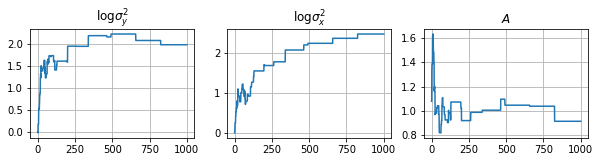

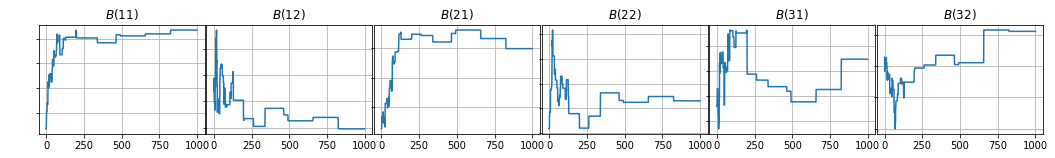

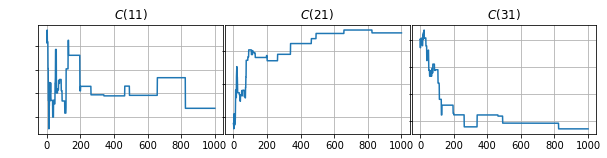

In [11]:
plot_chains(log_sigmay2, log_sigmax2, A_chain, C_chain, B_chain)